In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Polygon

In [45]:
dat_folder = 'data/logs/standalone/'
files = ['edge.log','cloud.log','edge-cloud.log']
header = ['time', 'latency', 'size']
column_names = ["Time","Latency (ms)","Size (MB)"]
data = {}
dfs_dict = {}

for file in files:
    i = 0
    time = 0
    run = []
    data[file[:-4]] = []
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            if 'Time' in l: pass
            elif '------' in l:
                data[file[:-4]].append(run)
                i = i + 1
                run = []
                time = 0
            else:
                x = l[:-2].split("(")[-1].split(",")
                lat, by = float(x[0]), float(x[1]) / 10**6
                run.append((time,lat,by))
                time = time + 1
                
for scenario in map(lambda s: s[:-4], files):
    dfs_list = []
    for run in data[scenario]:
        if len(dfs_list) < 25: dfs_list.append(pd.DataFrame(run, columns=column_names))
    dfs_dict[scenario] = dfs_list

In [46]:
dfs = {}
for s in map(lambda s: s[:-4], files):
    dfs_groupby = pd.concat(dfs_dict[s]).groupby('Time')
    dfs[s] = (dfs_groupby.mean(), dfs_groupby.std(), dfs_groupby.median(), dfs_groupby.max(), dfs_groupby.min())

In [110]:
col = 'Latency (ms)'
scenario = 'edge'
save_label = scenario + '_latency'

In [104]:
col = 'Latency (ms)'
scenario = 'cloud'
save_label = scenario + '_latency'

In [107]:
col = 'Latency (ms)'
scenario = 'edge-cloud'
save_label = scenario + '_latency'

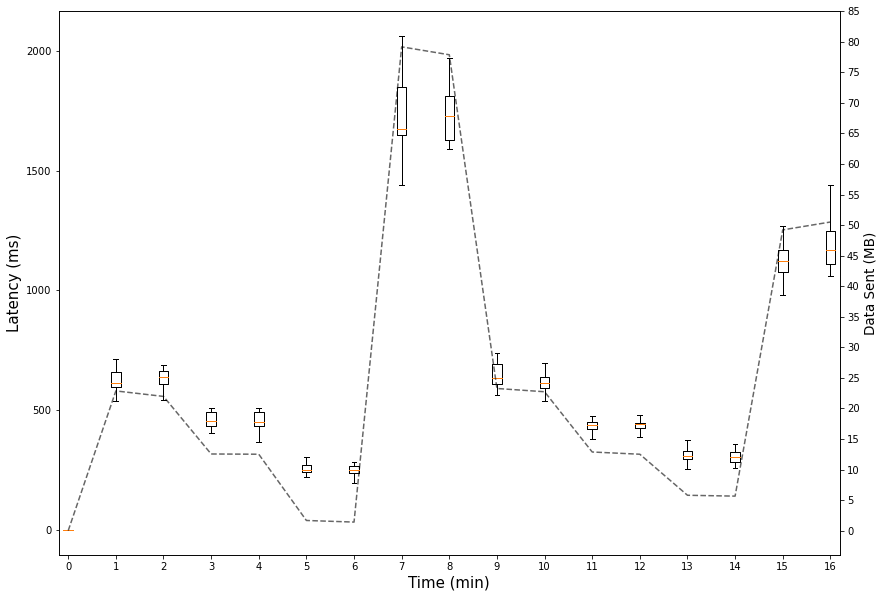

In [111]:
fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
y_size = dfs[scenario][0].reset_index()['Size (MB)']
x = dfs[scenario][0].reset_index()['Time']

all_data = []
size = ax_background.plot(
    x,
    y_size, 
    linestyle='dashed', 
    label='Data Sent', 
    color='black',  
    alpha=.6
)
ax_background.set_yticks(range(0, 90, 5))
ax_background.set_ylabel('Data Sent (MB)', fontsize=13.5)

for i in range(17):
    data = []
    for df in dfs_dict[scenario]:
        data += [df[col][i]]
    all_data += [data]
box = ax.boxplot(all_data,0,'',positions=range(0,17), widths = 0.2)
ax.set_xticklabels([x for x in range(0,17)])
ax.set_xlabel('Time (min)')
ax.set_ylabel(col)
ax.set_xlim(-0.2, 16.2)
ax.xaxis.get_label().set_size(15)
ax.yaxis.get_label().set_size(15)
plt.show()

In [109]:
fig.savefig(f'images/{save_label}.pdf', dpi=100)

In [75]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono') # Set font

facecolor_cloud = [204/255, 121/255, 167/255, .85]

facecolor_edge_cloud = [213/255, 94/255, 0., .85]


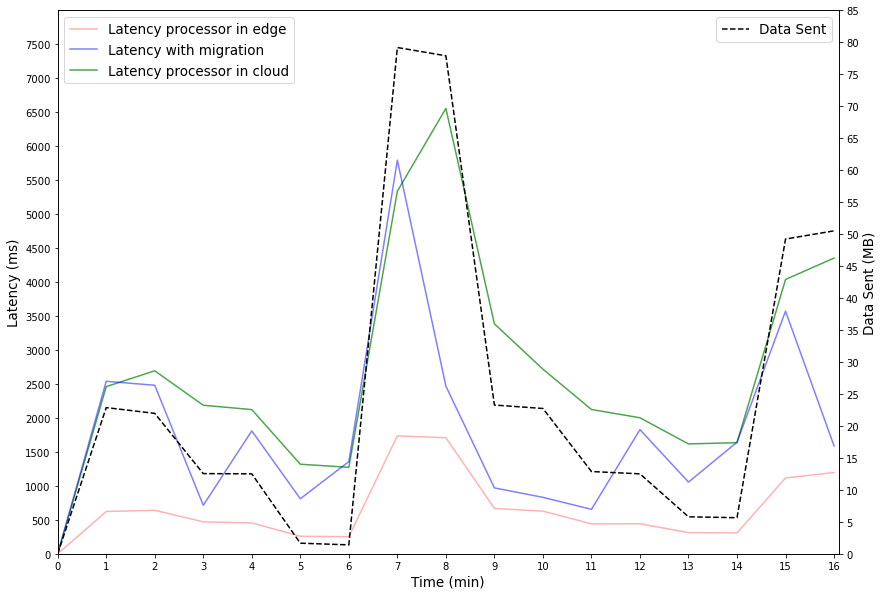

In [93]:
x = dfs['edge'][0].reset_index()['Time']
y_size = dfs['edge'][0].reset_index()['Size (MB)']
y_edge_cloud = dfs['edge-cloud'][0].reset_index()['Latency (ms)']
y_edge = dfs['edge'][0].reset_index()['Latency (ms)']
y_cloud = dfs['cloud'][0].reset_index()['Latency (ms)']


fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax.grid(False)
ax_background.grid(False)

# define background plot
size = ax_background.plot(
    x,
    y_size, 
    linestyle='dashed', 
    label='Data Sent', 
    color='black', 
    zorder=10000, 
    alpha=1
)
edge = ax.plot(
    x, 
    y_edge, 
    linestyle='solid', 
    label='Latency processor in edge', 
    color='red', 
    zorder=10000, 
    alpha=.3
)
edge_cloud = ax.plot(
    x, 
    y_edge_cloud,
    linestyle='solid', 
    label='Latency with migration', 
    color='blue', 
    zorder=100, 
    alpha=.5
)
cloud = ax.plot(
    x, 
    y_cloud, 
    linestyle='solid', 
    label='Latency processor in cloud', 
    color='green', 
    zorder=1, 
    alpha=.7
)

# set ticks and labels
ax.set_xlabel('Time (min)', fontsize=13.5)
ax.set_xticks(range(0, 17))
#ax.set_xticklabels([x for x in range(0, 16, .5)])

# background ticks and labels
ax.set_yticks(range(0, 8000, 500))
ax_background.set_yticks(range(0, 90, 5))
ax.set_xlim(0, 16.1)
ax.set_ylim(-.0001, 8000)
ax_background.set_ylim(-.0001, 85)
ax.set_ylabel('Latency (ms)', fontsize=13.5)
ax_background.set_ylabel('Data Sent (MB)', fontsize=13.5)

# legend settings
ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

In [94]:
fig.savefig(f'images/comparison.pdf', dpi=100)

In [95]:
area_edge = np.trapz(y_edge, dx=5)
print("area edge =", area_edge)
area_cloud = np.trapz(y_cloud, dx=5)
print("area cloud =", area_cloud)
area_edge_cloud = np.trapz(y_edge_cloud, dx=5)
print("area edge-cloud =", area_edge_cloud)

area edge = 53255.33333333333
area cloud = 218174.70476190478
area edge-cloud = 146575.15
